<a href="https://colab.research.google.com/github/avneeshdubey99/ML_Lab1/blob/master/ML_Assignment5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Regression on Fuel Consumption dataset

In [ ]:
%%capture
! pip install seaborn

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn import linear_model
from sklearn.model_selection import cross_val_score, KFold, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from keras.optimizers import Adam

In [2]:
path = 'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv'
df = pd.read_csv(path)

In [3]:
df.shape

(1067, 13)

Exploratory Data Analysis

In [4]:
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [5]:
df.isna().sum()

MODELYEAR                   0
MAKE                        0
MODEL                       0
VEHICLECLASS                0
ENGINESIZE                  0
CYLINDERS                   0
TRANSMISSION                0
FUELTYPE                    0
FUELCONSUMPTION_CITY        0
FUELCONSUMPTION_HWY         0
FUELCONSUMPTION_COMB        0
FUELCONSUMPTION_COMB_MPG    0
CO2EMISSIONS                0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


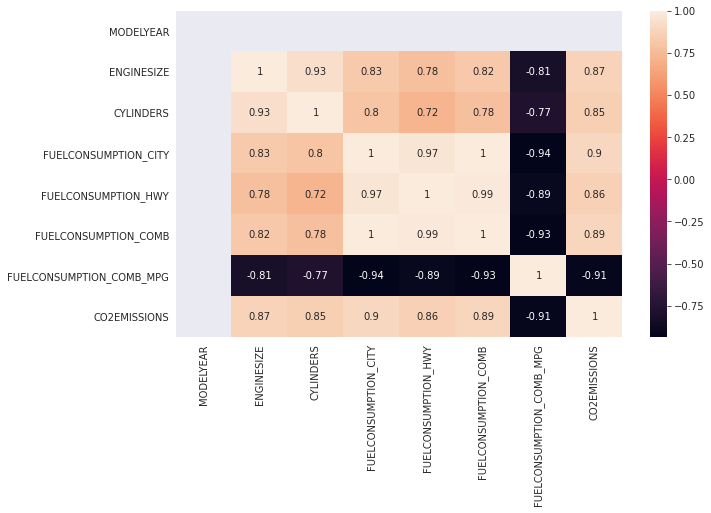

In [8]:
fcorr_data = df.corr()
plt.figure(figsize=(10, 6))
sns.set_style('darkgrid')
sns.heatmap(fcorr_data, annot=True)
plt.show()

In [10]:
print(df.MODELYEAR.unique())
df.drop('MODELYEAR', axis = 1, inplace = True)
df.drop('MODEL', axis = 1, inplace = True)
df.drop('MAKE', axis = 1, inplace = True)
df.head()

[2014]


,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [12]:
df = pd.get_dummies(df)
df.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS,VEHICLECLASS_COMPACT,VEHICLECLASS_FULL-SIZE,VEHICLECLASS_MID-SIZE,VEHICLECLASS_MINICOMPACT,VEHICLECLASS_MINIVAN,VEHICLECLASS_PICKUP TRUCK - SMALL,VEHICLECLASS_PICKUP TRUCK - STANDARD,VEHICLECLASS_SPECIAL PURPOSE VEHICLE,VEHICLECLASS_STATION WAGON - MID-SIZE,VEHICLECLASS_STATION WAGON - SMALL,VEHICLECLASS_SUBCOMPACT,VEHICLECLASS_SUV - SMALL,VEHICLECLASS_SUV - STANDARD,VEHICLECLASS_TWO-SEATER,VEHICLECLASS_VAN - CARGO,VEHICLECLASS_VAN - PASSENGER,TRANSMISSION_A4,TRANSMISSION_A5,TRANSMISSION_A6,TRANSMISSION_A7,TRANSMISSION_A8,TRANSMISSION_A9,TRANSMISSION_AM5,TRANSMISSION_AM6,TRANSMISSION_AM7,TRANSMISSION_AS4,TRANSMISSION_AS5,TRANSMISSION_AS6,TRANSMISSION_AS7,TRANSMISSION_AS8,TRANSMISSION_AS9,TRANSMISSION_AV,TRANSMISSION_AV6,TRANSMISSION_AV7,TRANSMISSION_AV8,TRANSMISSION_M5,TRANSMISSION_M6,TRANSMISSION_M7,FUELTYPE_D,FUELTYPE_E,FUELTYPE_X,FUELTYPE_Z
0,2.0,4,9.9,6.7,8.5,33,196,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2.4,4,11.2,7.7,9.6,29,221,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,1.5,4,6.0,5.8,5.9,48,136,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
3,3.5,6,12.7,9.1,11.1,25,255,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,3.5,6,12.1,8.7,10.6,27,244,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 49 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   ENGINESIZE                             1067 non-null   float64
 1   CYLINDERS                              1067 non-null   int64  
 2   FUELCONSUMPTION_CITY                   1067 non-null   float64
 3   FUELCONSUMPTION_HWY                    1067 non-null   float64
 4   FUELCONSUMPTION_COMB                   1067 non-null   float64
 5   FUELCONSUMPTION_COMB_MPG               1067 non-null   int64  
 6   CO2EMISSIONS                           1067 non-null   int64  
 7   VEHICLECLASS_COMPACT                   1067 non-null   uint8  
 8   VEHICLECLASS_FULL-SIZE                 1067 non-null   uint8  
 9   VEHICLECLASS_MID-SIZE                  1067 non-null   uint8  
 10  VEHICLECLASS_MINICOMPACT               1067 non-null   uint8  
 11  VEHI

In [15]:
x =df.drop('CO2EMISSIONS', axis = 1)
y =df['CO2EMISSIONS']
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.6)

In [19]:
linear = linear_model.LinearRegression()
ridge = linear_model.Ridge()
lasso= linear_model.Lasso()
elastic = linear_model.ElasticNet()
lasso_lars = linear_model.LassoLars()
bayes_ridge = linear_model.BayesianRidge()
logistics = linear_model.LogisticRegression()
sgd = linear_model.SGDClassifier()
passagg = linear_model.PassiveAggressiveClassifier()
ridgecv = linear_model.RidgeClassifierCV()
ridgeclass = linear_model.RidgeClassifier()
models_churn = [linear, ridge, lasso, elastic, lasso_lars, bayes_ridge]

In [22]:
def get_cv_scores(model):
    scores = cross_val_score(model, x_train, y_train, cv=5, scoring='neg_root_mean_squared_error')
    print('CV Mean: ', np.mean(scores))
    print('STD: ', np.std(scores))
    print('\n')

In [23]:
for i in models_churn:
    print(i)
    get_cv_scores(i)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
CV Mean:  -5.452076542879223
STD:  0.6832976158371779


Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)
CV Mean:  -5.589836442495607
STD:  0.591642193494255


Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)
CV Mean:  -9.141758170197416
STD:  0.9513962366662758


ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)
CV Mean:  -20.25883170361667
STD:  1.5208026107182198


LassoLars(alpha=1.0, copy_X=True, eps=2.220446049250313e-16, fit_intercept=True,
          fit_path=True, max_iter=500, normalize=True, posit

In [24]:
alpha = [0.5, 1, 1.5, 0.01, 2.5, 0.0001, 10, 100, 0.35]
solver = ['auto', 'svd']
param_grid = dict(alpha = alpha, solver = solver)

In [25]:
grids = GridSearchCV(estimator = ridge, param_grid = param_grid, scoring = 'r2', cv = 10)
grid_result = grids.fit(x_train, y_train)

Performing grid search and random search

In [26]:
rnds = RandomizedSearchCV(estimator = ridge, param_distributions = param_grid, scoring='r2', cv = 10)
rnds_result = rnds.fit(x_train, y_train)

In [27]:
print(grid_result.best_params_)
print(rnds_result.best_params_)

{'alpha': 0.01, 'solver': 'svd'}
{'solver': 'svd', 'alpha': 0.01}


In [28]:
print(grid_result.best_score_)
print(rnds_result.best_score_)

0.9926057235148571
0.9926057235148571


In [29]:
ridge=linear_model.Ridge(alpha=0.35,solver='auto')
ridge.fit(x_train, y_train)

Ridge(alpha=0.35, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [30]:
y_pred = ridge.predict(x_test)

In [31]:
from sklearn.metrics import accuracy_score,r2_score

In [32]:
r2_score(y_test,y_pred)

0.9911749579251946

# 2. Classification on Iris Dataset

Selecting linear model for high accuracy on cross-validation and test set and iris dataset

In [56]:
import pandas as pd
import numpy as np
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn import datasets
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from sklearn.datasets import load_iris
iris = load_iris()
data1 = pd.DataFrame(data= np.c_[iris['data'], iris['target']],columns= iris['feature_names'] + ['target'])
data1
encoder=OneHotEncoder(sparse=False)
##y = encoder.fit_transform(y)
print(data1)

     sepal length (cm)  sepal width (cm)  ...  petal width (cm)  target
0                  5.1               3.5  ...               0.2     0.0
1                  4.9               3.0  ...               0.2     0.0
2                  4.7               3.2  ...               0.2     0.0
3                  4.6               3.1  ...               0.2     0.0
4                  5.0               3.6  ...               0.2     0.0
..                 ...               ...  ...               ...     ...
145                6.7               3.0  ...               2.3     2.0
146                6.3               2.5  ...               1.9     2.0
147                6.5               3.0  ...               2.0     2.0
148                6.2               3.4  ...               2.3     2.0
149                5.9               3.0  ...               1.8     2.0

[150 rows x 5 columns]


In [57]:
x=data1.drop('target',axis=1)
y=data1['target']
X_train, X_test, y_train, y_test = train_test_split(x, y , test_size=0.2)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [58]:
X_train.shape

(120, 4)

In [59]:
from sklearn.linear_model import LogisticRegression
logisticregression = LogisticRegression()
logisticregression.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [60]:
y_pred = logisticregression.predict(X_test)
print(y_pred)

[1. 0. 2. 1. 1. 0. 1. 0. 1. 0. 0. 2. 1. 2. 1. 2. 1. 1. 1. 1. 0. 2. 2. 1.
 0. 0. 2. 1. 2. 2.]


In [61]:
from sklearn.metrics import accuracy_score

In [63]:
accuracy_score(y_test, y_pred)

0.9666666666666667

In [47]:
linear = linear_model.LinearRegression()
ridge = linear_model.Ridge()
lasso= linear_model.Lasso()
elastic = linear_model.ElasticNet()
lasso_lars = linear_model.LassoLars()
bayes_ridge = linear_model.BayesianRidge()
logistics = linear_model.LogisticRegression()
sgd = linear_model.SGDClassifier()
passagg = linear_model.PassiveAggressiveClassifier()
ridgecv = linear_model.RidgeClassifierCV()
ridgeclass = linear_model.RidgeClassifier()
models_log = [logistics, sgd, passagg, ridgecv, ridgeclass]

In [48]:
def get_cv_scores(model):
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    print('CV Mean: ', np.mean(scores))
    print('STD: ', np.std(scores))
    print('\n')

In [49]:
for i in models_log:
    print(i)
    get_cv_scores(i)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
CV Mean:  0.95
STD:  0.0311804782231162


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)
CV Mean:  0.925
STD:  0.04082482904638631


PassiveAggressiveClassifier(C=1.0, average=False, class_weight=None,
                            early_stopping=False, fit_intercept=True,
                         

In [50]:
solver = ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga']
param_grid = dict(solver = solver)
grids = GridSearchCV(estimator = logistics, param_grid = param_grid, scoring = 'r2', cv = 10)
grid_result = grids.fit(X_train, y_train)

Performing grid search and random search

In [51]:
solver = ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga']
param_grid = dict(solver = solver)
grids = GridSearchCV(estimator = logistics, param_grid = param_grid, scoring = 'r2', cv = 10)
grid_result = grids.fit(X_train, y_train)

In [52]:
print(grid_result.best_params_)
print(rnds_result.best_params_)

{'solver': 'newton-cg'}
{'solver': 'svd', 'alpha': 0.01}


In [53]:
print(grid_result.best_score_)
print(rnds_result.best_score_)

0.9324973808276585
0.9926057235148571


In [54]:
logisticregression = LogisticRegression(solver='newton-cg')
logisticregression.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [55]:
r2_score(y_test,y_pred)

0.9548872180451128